In [5]:
import numpy as np #import numpy library
import pandas as pd #import pandas library
import matplotlib.pyplot as plt #import matplot library
%matplotlib inline
import nltk.classify.util
from astropy.table import Table, Column

In [6]:
#Biometric Data individual days and merge together!

#load files
bio1 = pd.read_csv('sarahYee/basis-data-2016-04-23-metrics.csv')
bio2 = pd.read_csv('sarahYee/basis-data-2016-04-24-metrics.csv')
bio3 = pd.read_csv('sarahYee/basis-data-2016-04-25-metrics.csv')

#merge bio files
bioData = bio1.append([bio2, bio3])

#make sure all merged properly!
print(bioData.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
bioData.tail(5) #limit data to 5 rows including a header row 

(7200, 11)


,airtemp,bike,calories,gsr,heartrate,run,skintemp,sleep,steps,timestamp,walk
1435,85.1,NaN,1.1,0.000083,71,NaN,89.6,NaN,0,4/25/16 23:55,NaN
1436,85.1,NaN,1.0,0.000082,70,NaN,89.6,NaN,0,4/25/16 23:56,NaN
1437,85.1,NaN,1.0,0.000082,69,NaN,89.6,NaN,0,4/25/16 23:57,NaN
1438,86.0,NaN,1.1,0.000082,68,NaN,89.6,NaN,0,4/25/16 23:58,NaN
1439,86.0,NaN,1.0,0.000087,69,NaN,89.6,NaN,0,4/25/16 23:59,NaN


In [7]:
#Activity Data individual days and merge together!

#load data
act1 = pd.read_csv('sarahYee/basis-data-2016-04-23-activities.csv') #attach Amazon data to a var called data
act2 = pd.read_csv('sarahYee/basis-data-2016-04-24-activities.csv') #attach Amazon data to a var called data
act3 = pd.read_csv('sarahYee/basis-data-2016-04-25-activities.csv') #attach Amazon data to a var called data

#merge bio files
actData = act1.append([act2, act3])

#make sure all merged properly!
print(actData.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
actData.tail(5) #limit data to 5 rows including a header row 

(25, 19)


,start time,start time ISO,start time timezone,start time offset,end time,end time ISO,end time timezone,end time offset,type,actual seconds,steps,calories,minutes,heart rate avg,heart rate min,heart rate max,state,version,id
6,4/25/16 20:44,2016-04-25T20:44:24Z,America/New_York,-240,4/25/16 20:53,2016-04-25T20:53:16Z,America/New_York,-240,walk,348,728,26.299999,8.866667,111.149422,NaN,NaN,complete,1,walk__2016-04-25T204424
7,4/25/16 21:42,2016-04-25T21:42:28Z,America/New_York,-240,4/25/16 21:49,2016-04-25T21:49:23Z,America/New_York,-240,walk,372,691,33.299999,6.916667,118.666664,NaN,NaN,complete,1,walk__2016-04-25T214228
8,4/25/16 23:46,2016-04-25T23:46:09Z,America/New_York,-240,4/25/16 23:57,2016-04-25T23:57:53Z,America/New_York,-240,walk,351,769,34.200001,11.733333,118.170212,NaN,NaN,complete,1,walk__2016-04-25T234609
9,4/26/16 1:37,2016-04-26T01:37:46Z,America/New_York,-240,4/26/16 1:42,2016-04-26T01:42:41Z,America/New_York,-240,walk,216,466,13.200000,4.916667,110.152779,NaN,NaN,complete,1,walk__2016-04-26T013746
10,4/26/16 1:50,2016-04-26T01:50:26Z,America/New_York,-240,4/26/16 2:05,2016-04-26T02:05:03Z,America/New_York,-240,walk,431,796,32.799999,14.616667,117.231308,NaN,NaN,complete,1,walk__2016-04-26T015026


In [20]:
# bioRowCount = bioData.shape[0]

# print(bioRowCount)

condition = "(bioData['timestamp'] >= actData['start time'] and bioData['timestamp'] <= actData['end time'])"
walkCondition = "(actData['type'] == 'walk')"
runCondition = "(actData['type'] == 'run')"
bikeCondition = "(actData['type'] == 'bike')"

# for timestamp in bioData.where(condition):
#         bioData.walk = type(TRUE)

for time in bioData['timestamp']:
    for time in actData['start time']:
        if (condition):
            bioData['walk'] = 1 if (walkCondition) else 0;
#         bioData['bike'] = 1 if (bikeCondition) else 0;
#         bioData['run'] = 1 if (runCondition) else 0;
    
#     if (condition):
#         if (walkCondition):
#             bioData['walk'] = 1
#             print('test')

# print(bioData)
bioData.head(10000)
    

,airtemp,bike,calories,gsr,heartrate,run,skintemp,sleep,steps,timestamp,walk
0,89.6,NaN,1.4,0.000059,91,NaN,92.3,NaN,0,4/23/16 0:00,1
1,89.6,NaN,1.5,0.000059,92,NaN,92.3,NaN,0,4/23/16 0:01,1
2,89.6,NaN,1.6,0.000062,94,NaN,92.3,NaN,0,4/23/16 0:02,1
3,89.6,NaN,1.7,0.000059,95,NaN,92.3,NaN,0,4/23/16 0:03,1
4,89.6,NaN,1.7,0.000061,98,NaN,92.3,NaN,0,4/23/16 0:04,1
5,89.6,NaN,1.5,0.000060,91,NaN,92.3,NaN,0,4/23/16 0:05,1
6,89.6,NaN,1.7,0.000061,93,NaN,92.3,NaN,0,4/23/16 0:06,1
7,89.6,NaN,1.5,0.000061,93,NaN,92.3,NaN,0,4/23/16 0:07,1
8,89.6,NaN,1.7,0.000060,97,NaN,92.3,NaN,0,4/23/16 0:08,1
9,89.6,NaN,1.5,0.000057,92,NaN,92.3,NaN,0,4/23/16 0:09,1


In [17]:
#Sleep Data individual days and merge together!

#load data
sleep1 = pd.read_csv('sarahYee/basis-data-2016-04-23-sleep.csv') #attach Amazon data to a var called data
sleep2 = pd.read_csv('sarahYee/basis-data-2016-04-24-sleep.csv') #attach Amazon data to a var called data
sleep3 = pd.read_csv('sarahYee/basis-data-2016-04-25-sleep.csv') #attach Amazon data to a var called data

#merge bio files
sleepData = sleep1.append([sleep2, sleep3])

#make sure all merged properly!
print(sleepData.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
sleepData.tail(5) #limit data to 5 rows including a header row 

(3, 24)


,start time,start time ISO,start time timezone,start time offset,end time,end time ISO,end time timezone,end time offset,light mins,deep mins,...,toss turns,type,actual seconds,calories,heart rate avg,heart rate min,heart rate max,state,version,id
0,4/24/16 5:15,2016-04-24T05:15:51Z,America/New_York,-240,4/24/16 12:35,2016-04-24T12:35:22Z,America/New_York,-240,204,96,...,27,sleep,25740,442.600006,71.495384,NaN,NaN,complete,2,sleep__2016-04-24T051551
0,4/25/16 5:20,2016-04-25T05:20:10Z,America/New_York,-240,4/25/16 11:49,2016-04-25T11:49:10Z,America/New_York,-240,167,113,...,29,sleep,23340,401.299988,68.094719,NaN,NaN,complete,2,sleep__2016-04-25T052010
0,4/26/16 5:26,2016-04-26T05:26:30Z,America/New_York,-240,4/26/16 11:45,2016-04-26T11:45:30Z,America/New_York,-240,185,93,...,23,sleep,22740,390.899994,68.644577,NaN,NaN,complete,2,sleep__2016-04-26T052630


In [4]:
merge1 = pd.DataFrame({range(actData['start time'],actData['end time'], )

# list(range(10, 20))


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpScore,helpful
454995,457613,457614,B008Z5L2MW,A2W7HYIQWAJ091,"Bonnie Pierce ""TexasBonnieBelle""",0,0,5,1349049600,Outstanding - what else?,Starbucks French Roast is excellent - what els...,NaN,False
454996,283509,283510,B0045Z4JAI,AZ3GK5ZX3SVKT,gsue,2,2,2,1306195200,"Too weak, not enough umph!",I was disappointed in this product. It tasted...,1,False
454997,292569,292570,B001BM68S4,A359CZWDE8MPMF,LC,0,0,5,1314576000,Good Stuff,"<a href=""http://www.amazon.com/gp/product/B001...",NaN,False
454998,156159,156160,B002YLG5MA,A1V8J8FKBZW68K,"Ansella Adams ""Valley Lady""",4,4,5,1275350400,Way to Start the Day!,We have been using several of the Great River ...,1,True
454999,119066,119067,B004IREFUM,A1MYYCC9BSYV5Y,Colorado Mom,0,0,5,1338422400,Delicious,I love the Lively Colombian K-Cups. It is ver...,NaN,False


AttributeError: max must be larger than min in range parameter.

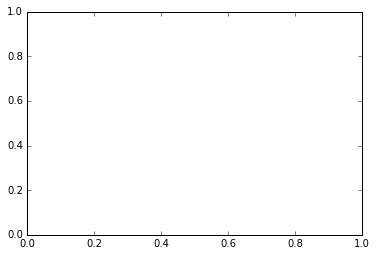

In [5]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(data["helpScore"])

# Show the plot.
plt.show()

In [6]:
#smData = data[0:1000] #make a variabe for data subset limited to first 1000 
#smData.shape #show how many rows and columns we have
#print(smData.shape) #print data rows and columns
#smData.head(5) #limit data to 5 rows including a header row 

In [7]:
#convert summary NaNs into usable format
data.Summary = data.Summary.fillna('none')

In [8]:
# features from Amazon.csv to add to feature set

# Features pulled from review txt
data['reviewLen'] = data['Text'].str.len() #captures the amount of strings present in the review (i.e. review length)
data['hasEP'] = data['Text'].str.contains('!') #captures the presences of an exclaimation point

# 1st Attempt to add punctuation 
data['hasSemi'] = data['Text'].str.contains(';') #captures the presences of a ;
data['hasColon'] = data['Text'].str.contains(':') #captures the presences of a :
data['hasAt'] = data['Text'].str.contains('@') #captures the presences of a @
data['hasDolla'] = data['Text'].str.contains('$') #captures the presences of a $
data['hasNumb'] = data['Text'].str.contains('#') #captures the presences of a #
data['hasAnd'] = data['Text'].str.contains('&') #captures the presences of a &

# 2nd Attempt adding punctuation that needs \ before (error the first time)
data['hasQuestion'] = data['Text'].str.contains('\?') #captures the presences of a ?
data['hasAsterick'] = data['Text'].str.contains('\*') #captures the presences of a *
data['hasFparenthesis'] = data['Text'].str.contains('\(') #captures the presences of a (
data['hasBparenthesis'] = data['Text'].str.contains('\)') #captures the presences of a )

# add counts for punctuation 
data['epCount'] = data['Text'].str.count('!')
data['semiCount'] = data['Text'].str.count(':')
data['atCount'] = data['Text'].str.count('@')
data['dollaCount'] = data['Text'].str.count('$')
data['numbCount'] = data['Text'].str.count('#')
data['andCount'] = data['Text'].str.count('&')
data['questionCount'] = data['Text'].str.count('\?')
data['asterickCount'] = data['Text'].str.count('\*')
data['fParenthesisCount'] = data['Text'].str.count('\(')
data['bParenthesisCount'] = data['Text'].str.count('\)')

# add punctuation count and ratio of punctuation to words -- thank you jon!
data['punctuationCount'] = data['Text'].str.count('[.,!;:()/\?-@#$&]') #captures total common punctuation count
data['punctuationToWords'] = data['punctuationCount'] / data['reviewLen'] #captures ratio of punctuation to words

# add certain words

# find repeating reviews
data['repeatTxt'] = data.duplicated('Text')

# add vars from profile name 
data['nameNumb'] = data['ProfileName'].str.contains('#') #captures profile name with a number sign
data['nameQuestion'] = data['ProfileName'].str.contains('\?')#captures profile name with a question mark
data['nameAsterick'] = data['ProfileName'].str.contains('\*') #captures profile name with an asterick
data['nameAnd'] = data['ProfileName'].str.contains('&') #captures the presences of a &
data['nameSemi'] = data['ProfileName'].str.contains(';') #captures the presences of a ;
data['nameColon'] = data['ProfileName'].str.contains(':') #captures the presences of a :
data['nameAt'] = data['ProfileName'].str.contains('@') #captures the presences of a @
data['nameDolla'] = data['ProfileName'].str.contains('$') #captures the presences of a $

# finding repeating profile names 
data['repeatProfile'] = data.duplicated('ProfileName')

# Features pulled from summary txt
data['summaryLen'] = data['Summary'].str.len() #captures the amount of strings present in the review (i.e. review length)
data['summaryEP'] = data['Summary'].str.contains('!') #captures the presences of an exclaimation point

# 1st Attempt to add punctuation 
data['summarySemi'] = data['Summary'].str.contains(';') #captures the presences of a ;
data['summaryColon'] = data['Summary'].str.contains(':') #captures the presences of a :
data['summaryAt'] = data['Summary'].str.contains('@') #captures the presences of a @
data['summaryDolla'] = data['Summary'].str.contains('$') #captures the presences of a $
data['summaryNumb'] = data['Summary'].str.contains('#') #captures the presences of a #
data['summaryAnd'] = data['Summary'].str.contains('&') #captures the presences of a &

# 2nd Attempt adding punctuation that needs \ before (error the first time)
data['summaryQuestion'] = data['Summary'].str.contains('\?') #captures the presences of a ?
data['summaryAsterick'] = data['Summary'].str.contains('\*') #captures the presences of a *
data['summaryFparenthesis'] = data['Summary'].str.contains('\(') #captures the presences of a (
data['summaryBparenthesis'] = data['Summary'].str.contains('\)') #captures the presences of a )

# add counts for punctuation 
data['summaryEpCount'] = data['Summary'].str.count('!')
data['summarySemiCount'] = data['Summary'].str.count(':')
data['summaryAtCount'] = data['Summary'].str.count('@')
data['summaryDollaCount'] = data['Summary'].str.count('$')
data['summaryNumbCount'] = data['Summary'].str.count('#')
data['summaryAndCount'] = data['Summary'].str.count('&')
data['summaryQuestionCount'] = data['Summary'].str.count('\?')
data['summaryAsterickCount'] = data['Summary'].str.count('\*')
data['summaryFParenthesisCount'] = data['Summary'].str.count('\(')
data['summaryBParenthesisCount'] = data['Summary'].str.count('\)')

# add punctuation count and ratio of punctuation to words -- thank you jon!
data['summaryPunctuationCount'] = data['Summary'].str.count('[.,!;:()/\?-@#$&]') #captures total common punctuation count
data['summaryPunctuationToWords'] = data['punctuationCount'] / data['summaryLen'] #captures ratio of punctuation to words

# add certain words

# find repeating reviews
data['summaryRepeatTxt'] = data.duplicated('Summary')


In [9]:
# Taking values and making vectors
XScore = data.iloc[:, 7].values.reshape(data.shape[0], 1)
XreviewLen = data.iloc[:, 13].values.reshape(data.shape[0], 1)
XhasEP = data.iloc[:, 14].values.reshape(data.shape[0], 1)
XhasSemi = data.iloc[:, 15].values.reshape(data.shape[0], 1)
XhasColon = data.iloc[:, 16].values.reshape(data.shape[0], 1)
hasAt = data.iloc[:, 17].values.reshape(data.shape[0], 1)
hasDolla = data.iloc[:, 18].values.reshape(data.shape[0], 1)
hasNumb = data.iloc[:, 19].values.reshape(data.shape[0], 1)
hasAnd = data.iloc[:, 20].values.reshape(data.shape[0], 1)
hasQuestion = data.iloc[:, 21].values.reshape(data.shape[0], 1)
hasAsterick = data.iloc[:, 22].values.reshape(data.shape[0], 1)
hasFparenthesis = data.iloc[:, 23].values.reshape(data.shape[0], 1)
hasBparenthesis = data.iloc[:, 24].values.reshape(data.shape[0], 1)
epCount = data.iloc[:, 25].values.reshape(data.shape[0], 1)
semiCount = data.iloc[:, 26].values.reshape(data.shape[0], 1)
atCount = data.iloc[:, 27].values.reshape(data.shape[0], 1)
dollaCount = data.iloc[:, 28].values.reshape(data.shape[0], 1)
numbCount = data.iloc[:, 29].values.reshape(data.shape[0], 1)
andCount = data.iloc[:, 30].values.reshape(data.shape[0], 1)
questionCount = data.iloc[:, 31].values.reshape(data.shape[0], 1)
asterickCount = data.iloc[:, 32].values.reshape(data.shape[0], 1)
fParenthesisCount = data.iloc[:, 33].values.reshape(data.shape[0], 1)
bParenthesisCount = data.iloc[:, 34].values.reshape(data.shape[0], 1)
punctuationCount = data.iloc[:, 35].values.reshape(data.shape[0], 1)
punctuationToWords = data.iloc[:, 36].values.reshape(data.shape[0], 1)
repeatTxt = data.iloc[:, 37].values.reshape(data.shape[0], 1)
nameNumb = data.iloc[:, 38].values.reshape(data.shape[0], 1)
nameQuestion = data.iloc[:, 39].values.reshape(data.shape[0], 1)
nameAsterick = data.iloc[:, 40].values.reshape(data.shape[0], 1)
nameAnd = data.iloc[:, 41].values.reshape(data.shape[0], 1)
nameSemi = data.iloc[:, 42].values.reshape(data.shape[0], 1)
nameColon = data.iloc[:, 43].values.reshape(data.shape[0], 1)
nameAt = data.iloc[:, 44].values.reshape(data.shape[0], 1)
nameDolla = data.iloc[:, 45].values.reshape(data.shape[0], 1)
repeatProfile = data.iloc[:, 46].values.reshape(data.shape[0], 1)
summaryLen = data.iloc[:, 47].values.reshape(data.shape[0], 1)
summaryEP = data.iloc[:, 48].values.reshape(data.shape[0], 1)
summarySemi = data.iloc[:, 49].values.reshape(data.shape[0], 1)
summaryColon = data.iloc[:, 50].values.reshape(data.shape[0], 1)
summaryAt = data.iloc[:, 51].values.reshape(data.shape[0], 1)
summaryDolla = data.iloc[:, 52].values.reshape(data.shape[0], 1)
summaryNumb = data.iloc[:, 53].values.reshape(data.shape[0], 1)
summaryAnd = data.iloc[:, 54].values.reshape(data.shape[0], 1)
summaryQuestion = data.iloc[:, 55].values.reshape(data.shape[0], 1)
summaryAsterick = data.iloc[:, 56].values.reshape(data.shape[0], 1)
summaryFparenthesis = data.iloc[:, 57].values.reshape(data.shape[0], 1)
summaryBparenthesis = data.iloc[:, 58].values.reshape(data.shape[0], 1)
summaryEpCount = data.iloc[:, 59].values.reshape(data.shape[0], 1)
summarySemiCount = data.iloc[:, 60].values.reshape(data.shape[0], 1)
summaryAtCount = data.iloc[:, 61].values.reshape(data.shape[0], 1)
summaryDollaCount = data.iloc[:, 62].values.reshape(data.shape[0], 1)
summaryNumbCount = data.iloc[:, 63].values.reshape(data.shape[0], 1)
summaryAndCount = data.iloc[:, 64].values.reshape(data.shape[0], 1)
summaryQuestionCount = data.iloc[:, 65].values.reshape(data.shape[0], 1)
summaryAsterickCount = data.iloc[:, 66].values.reshape(data.shape[0], 1)
summaryFParenthesisCount = data.iloc[:, 67].values.reshape(data.shape[0], 1)
summaryBParenthesisCount = data.iloc[:, 68].values.reshape(data.shape[0], 1)
summaryPunctuationCount = data.iloc[:, 69].values.reshape(data.shape[0], 1)
summaryPunctuationToWords = data.iloc[:, 70].values.reshape(data.shape[0], 1)
summaryRepeatTxt = data.iloc[:, 71].values.reshape(data.shape[0], 1)


In [10]:
-

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,summaryDollaCount,summaryNumbCount,summaryAndCount,summaryQuestionCount,summaryAsterickCount,summaryFParenthesisCount,summaryBParenthesisCount,summaryPunctuationCount,summaryPunctuationToWords,summaryRepeatTxt
0,138806,138807,B000E63LME,A1CQGW1AOD0LF2,"Alena K. ""Alena""",1,2,2,1294185600,Not as pictured.,...,1,0,0,0,0,0,0,1,0.125000,False
1,469680,469681,B004ZIH4KM,A37S7U1OX2MCWI,Becky Cole,0,0,5,1349740800,seeds,...,1,0,0,0,0,0,0,0,0.600000,False
2,238202,238203,B003ZXE9QA,A2OM6G73E64EQ9,jeff,0,0,5,1329264000,I'm addicted!,...,1,0,0,0,0,0,0,1,1.076923,False
3,485307,485308,B001RVFERK,A25W349EE97NBK,Tangent4,1,1,4,1248307200,I wanted to love these...,...,1,0,0,0,0,0,0,3,1.240000,False
4,375283,375284,B000OQZNTS,A3CPPW0HUC07YS,Amy Nicolai,0,0,5,1333238400,Excellent chamomile tea,...,1,0,0,0,0,0,0,0,0.260870,False


In [10]:
# y = data.iloc[:, 12].values
# y = np.where(y == 'true', -1, 1)

# X = data.iloc[:, 35].values #punctuation count

# plt.scatter(X[:50, 0], X[:50, 1],
# ... color='red', marker='o', label='helpfulness')

In [11]:
# report on training and test sets
global SVMerror, SVMacc, SVMtp, SVMtn, LRerror, LRacc, LRtp, LRtn, NBerror, NBacc, NBtp, NBtn, Perror, Pacc, Ptp, Ptn



def print_results(model):
    #print('Error rate on training set: ')
    erTRAIN = ((y_train != y_pred).sum() / X_train.shape[0])
    #print('Accuracy rate on training set: ')
    AccTRAIN = (1 - (y_train != y_pred).sum() / X_train.shape[0])
    #print('True positive rate on training tet:')
    TruPosTRAIN = ((y_train==True) & (y_pred==True)).sum() / y_train.sum()
    #TruNegTEST = (((y_train==False) & (y_pred_train==False)).sum() / (y_train.shape[0] - y_train.sum()))
    #print('**************')
    #('Error rate on test set: ')
    erTEST = ((y_test != y_pred_test).sum() / X_test.shape[0])
    #print('Accuracy rate on test set: ')
    AccTEST = (1 - (y_test != y_pred_test).sum() / X_test.shape[0])
    #print('True positive rate on test set')
    TruPosTEST = (((y_test==True) & (y_pred_test==True)).sum() / y_test.sum())
    #print('True negative rate on test set')
    TruNegTEST = (((y_test==False) & (y_pred_test==False)).sum() / (y_test.shape[0] - y_test.sum()))
    data_rows = [('Error Rate', erTRAIN, erTEST),
                 ('Accuracy Rate', AccTRAIN, AccTEST),
                 ('True Positives', TruPosTRAIN, TruPosTEST),
                 ('True Negatives', '--', TruNegTEST)]
    t = Table(rows=data_rows, names=(model, 'Training Set', 'Test Set'), meta={'name': model + ': Training and Test Set Results'})
    print(t)
    if model == 'SVM':
        SVMerror = erTEST
        SVMacc = AccTEST
        SVMtp = TruPosTEST
        SVMtn = TruNegTEST
        return(SVMerror, SVMacc, SVMtp, SVMtn)
    elif model == 'Logistic Regression':
        LRerror = erTEST
        LRacc = AccTEST
        LRtp = TruPosTEST
        LRtn = TruNegTEST
        return(LRerror, LRacc, LRtp, LRtn)
    elif model == 'Naive Bayes':
        NBerror = erTEST
        NBacc = AccTEST
        NBtp = TruPosTEST
        NBtn = TruNegTEST
        return(NBerror, NBacc, NBtp, NBtn)
    elif model == 'Perceptron':
        Perror = erTEST
        Pacc = AccTEST
        Ptp = TruPosTEST
        Ptn = TruNegTEST
        return(Perror, Pacc, Ptp, Ptn)
    print('done')
      
    #t.show_in_browser(jsviewer=True) 
    
    
def all_models_table():
    all_rows = [('SVM', SVMerror, SVMacc, SVMtp, SVMtn),
            ('Logistic Regression', LRerror, LRacc, LRtp, LRtn),
            ('Naive Bayes', NBerror, NBacc, NBtp, NBtn),
            ('Perceptron', Perror, Pacc, Ptp, Ptn)]
    tt = Table(rows=all_rows, names=('', 'Error Rate', 'Accuracy', 'True +', 'True -'), meta={'3/15/2016'})
    print(tt)

In [ ]:
# vectorize Bag of Words from review text; as sparse matrix
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
X = hv.transform(data.Text)
X.shape
# (455000, 131072)

# # vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import TfidfVectorizer
# tv = TfidfVectorizer(min_df=1, ngram_range=(2,17))
# X = tv.fit_transform(data.Text)

In [24]:
# convert additional features to sparse matrix and concatenate onto the bag of words sparse matrix
from scipy.sparse import csr_matrix, hstack
XtoaddSparse = csr_matrix(Xtoadd)
Xfinal = hstack([X, XtoaddSparse])
X = csr_matrix(Xfinal)

TypeError: no supported conversion for types: (dtype('O'),)

In [25]:
# define y
y = data.iloc[:, 12].values
y.shape

(455000,)

In [26]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [27]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
# decision tree classifier

# from sklearn import tree
# X = [[0, 0], [1, 1]]
# Y = [0, 1]
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)

In [29]:
# MODEL: SVM, linear
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('SVM')

     SVM          Training Set      Test Set   
-------------- ----------------- --------------
    Error Rate 0.000888540031397   0.1523003663
 Accuracy Rate    0.999111459969   0.8476996337
True Positives    0.992853452729 0.444888577995
True Negatives                -- 0.879566458223


(0.15230036630036631,
 0.84769963369963364,
 0.44488857799540321,
 0.87956645822298463)

In [30]:
# MODEL: logistic regression
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Logistic Regression')

Logistic Regression    Training Set      Test Set   
------------------- ----------------- --------------
         Error Rate 0.000781789638932 0.144505494505
      Accuracy Rate    0.999218210361 0.855494505495
     True Positives    0.993714482521 0.433996202658
     True Negatives                -- 0.888839698639


(0.14450549450549449,
 0.85549450549450556,
 0.43399620265813932,
 0.88883969863945045)

In [31]:
# MODEL: Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Naive Bayes')

 Naive Bayes     Training Set       Test Set   
-------------- ---------------- ---------------
    Error Rate 0.00194662480377 0.0805054945055
 Accuracy Rate   0.998053375196  0.919494505495
True Positives   0.999354227656  0.328969721195
True Negatives               --   0.96621156902


(0.080505494505494504,
 0.91949450549450551,
 0.32896972119516338,
 0.96621156901962957)

In [32]:
# Perceptron
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='perceptron')
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Perceptron')

  Perceptron      Training Set      Test Set   
-------------- ----------------- --------------
    Error Rate 0.000813186813187 0.153282051282
 Accuracy Rate    0.999186813187 0.846717948718
True Positives    0.993542276563 0.443089837114
True Negatives                --  0.87864941143


(0.15328205128205127,
 0.8467179487179487,
 0.44308983711402017,
 0.87864941142988151)